In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, classification_report
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [4]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, classification_report
)
import numpy as np
import matplotlib.pyplot as plt

# Veri setini bağımlı ve bağımsız değişkenlere ayırma
X = df.drop('Accident_Severity', axis=1)._get_numeric_data()
y = df['Accident_Severity']

# Veriyi eğitim ve test kümelerine ayırma (shuffling ile %70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True  
)

# Random Forest modelini oluşturma
rf_model = RandomForestClassifier(random_state=42)

# Bayes optimizasyonu ile hiperparametre arama
param_space = {
    'n_estimators': (50, 300),  # n_estimators aralığı
    'max_depth': (10, 40),  # max_depth aralığı
    'min_samples_split': (2, 10),  # min_samples_split aralığı
    'min_samples_leaf': (1, 4),  # min_samples_leaf aralığı
    'max_features': ['sqrt', 'log2', None]  # max_features seçenekleri
}

bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=5,  # Kaç kombinasyon denenecek
    scoring='accuracy',
    cv=5,  # 5 katlı çapraz doğrulama
    random_state=42,
    n_jobs=-1  # Paralel işlem
)
bayes_search.fit(X_train, y_train)

# Bayes optimizasyonu sonrası en iyi hiperparametreler
print("\nEn iyi hiperparametreler (Bayes Optimasyonu):")
print(bayes_search.best_params_)

# En iyi modeli kullanarak test setinde tahmin
best_rf_bayes = bayes_search.best_estimator_
y_pred_bayes = best_rf_bayes.predict(X_test)
y_proba_bayes = best_rf_bayes.predict_proba(X_test)

# Performans değerlendirme metrikleri (Bayes optimizasyonu sonrası)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
precision_bayes = precision_score(y_test, y_pred_bayes, average='weighted')
recall_bayes = recall_score(y_test, y_pred_bayes, average='weighted')
f1_bayes = f1_score(y_test, y_pred_bayes, average='weighted')

print("\nTest Set Performance (Bayes Optimasyonu):")
print(f"Accuracy: {accuracy_bayes:.2f}")
print(f"Precision (Weighted): {precision_bayes:.2f}")
print(f"Recall (Weighted): {recall_bayes:.2f}")
print(f"F1 Score (Weighted): {f1_bayes:.2f}")



En iyi hiperparametreler (Bayes Optimasyonu):
OrderedDict({'max_depth': 22, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 218})

Test Set Performance (Bayes Optimasyonu):
Accuracy: 0.73
Precision (Weighted): 0.71
Recall (Weighted): 0.73
F1 Score (Weighted): 0.68



Test Set Performance (Bayes Optimasyonu):
Accuracy: 0.73
Precision (Weighted): 0.71
Recall (Weighted): 0.73
F1 Score (Weighted): 0.68


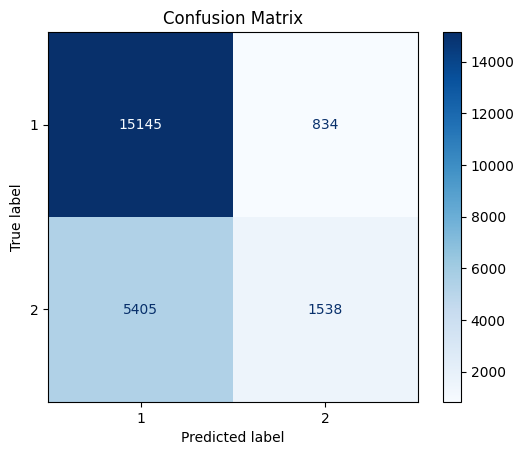

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Değerlendirme metrikleri
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
precision_bayes = precision_score(y_test, y_pred_bayes, average='weighted')
recall_bayes = recall_score(y_test, y_pred_bayes, average='weighted')
f1_bayes = f1_score(y_test, y_pred_bayes, average='weighted')

# Performans değerlendirme
print("\nTest Set Performance (Bayes Optimasyonu):")
print(f"Accuracy: {accuracy_bayes:.2f}")
print(f"Precision (Weighted): {precision_bayes:.2f}")
print(f"Recall (Weighted): {recall_bayes:.2f}")
print(f"F1 Score (Weighted): {f1_bayes:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_bayes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


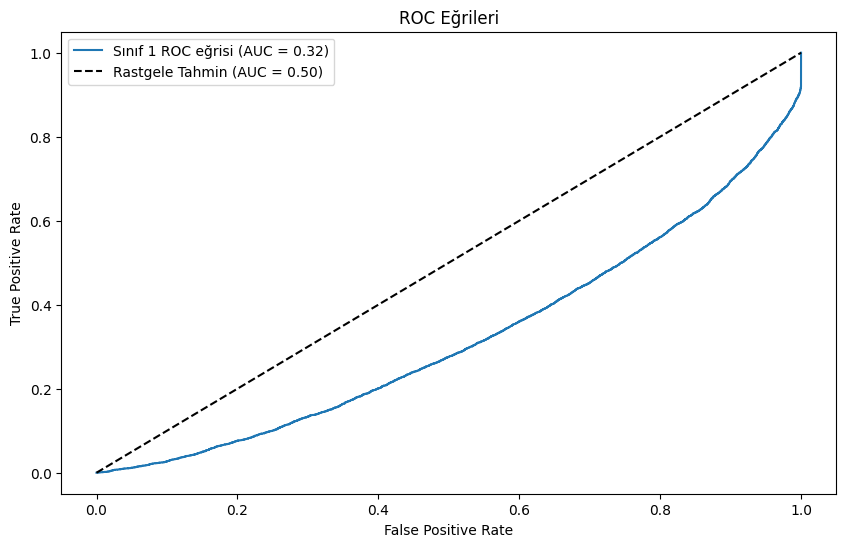

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ROC eğrisinin çizilmesi
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Sınıf sayısını al
n_classes = y_test_bin.shape[1]

# Her sınıf için ROC eğrisini hesapla
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_bayes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çiz
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Sınıf {i+1} ROC eğrisi (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri')
plt.legend()
plt.show()


In [35]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00



En iyi hiperparametreler (Bayes Optimasyonu):
OrderedDict([('depth', 6), ('iterations', 927), ('l2_leaf_reg', 2), ('learning_rate', 0.048999952168320274)])

Test Set Performance (Bayes Optimasyonu - CatBoost):
Accuracy: 0.73
Precision (Weighted): 0.75
Recall (Weighted): 0.73
F1 Score (Weighted): 0.66


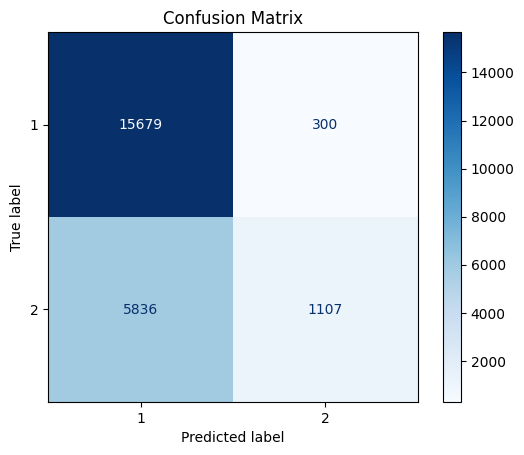

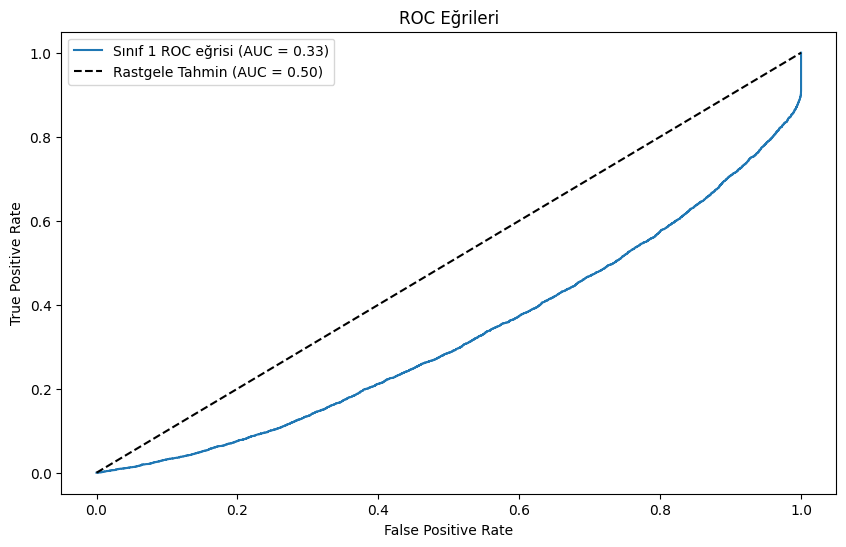

In [38]:
# Gerekli kütüphaneleri yükleyin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Veri setini bağımlı ve bağımsız değişkenlere ayırma
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CatBoost modelini oluşturma
catboost_model = CatBoostClassifier(learning_rate=0.1, iterations=1000, depth=6, random_state=42, verbose=0)

# Bayes optimizasyonu ile hiperparametre arama
param_space = {
    'iterations': (100, 1000),
    'depth': (3, 10),
    'learning_rate': (0.01, 0.1),
    'l2_leaf_reg': (1, 10)
}

bayes_search = BayesSearchCV(
    estimator=catboost_model,
    search_spaces=param_space,
    n_iter=5,  # Kaç kombinasyon denenecek
    scoring='accuracy',
    cv=5,  # 5 katlı çapraz doğrulama
    random_state=42,
    n_jobs=-1  # Paralel işlem
)

# Bayes optimizasyonunu başlatma
bayes_search.fit(X_train, y_train)

# En iyi hiperparametreler
print("\nEn iyi hiperparametreler (Bayes Optimasyonu):")
print(bayes_search.best_params_)

# En iyi modeli kullanarak test setinde tahmin yapma
best_catboost = bayes_search.best_estimator_
y_pred_catboost = best_catboost.predict(X_test)
y_proba_catboost = best_catboost.predict_proba(X_test)

# Performans değerlendirme metrikleri
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost, average='weighted')
recall_catboost = recall_score(y_test, y_pred_catboost, average='weighted')
f1_catboost = f1_score(y_test, y_pred_catboost, average='weighted')

# Performans metrikleri yazdırma
print("\nTest Set Performance (Bayes Optimasyonu - CatBoost):")
print(f"Accuracy: {accuracy_catboost:.2f}")
print(f"Precision (Weighted): {precision_catboost:.2f}")
print(f"Recall (Weighted): {recall_catboost:.2f}")
print(f"F1 Score (Weighted): {f1_catboost:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_catboost)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Eğrisini çizmek için veriyi binarize etme
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Her sınıf için ROC eğrisini hesaplama
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_catboost[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çizme
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Sınıf {i+1} ROC eğrisi (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri')
plt.legend()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1338/1338 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6674 - loss: 0.6820 - val_accuracy: 0.7019 - val_loss: 0.5971
Epoch 2/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6972 - loss: 0.6067 - val_accuracy: 0.7021 - val_loss: 0.5958
Epoch 3/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6938 - loss: 0.6075 - val_accuracy: 0.7047 - val_loss: 0.6001
Epoch 4/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6948 - loss: 0.6053 - val_accuracy: 0.7033 - val_loss: 0.5950
Epoch 5/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6937 - loss: 0.6064 - val_accuracy: 0.7035 - val_loss: 0.5941
Epoch 6/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6900 - loss: 0.6079 - val_accuracy: 0.7032 - val_loss: 0.5963
Epoch 7/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6967 - loss: 0.6022 - val_accuracy: 0.7037 - val_loss: 0.5942
Epoch 8/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6920 - loss: 0.6063 - val_

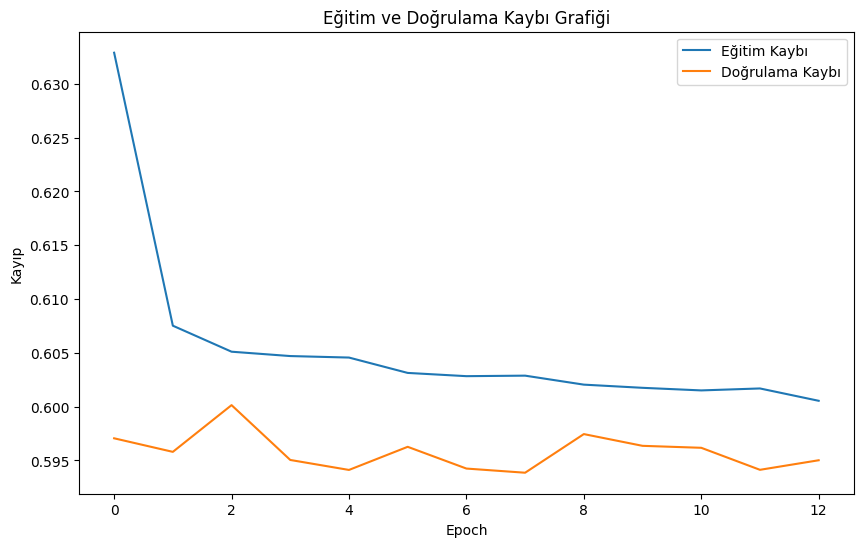

717/717 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Test Set Performance (Keras Modeli):
Accuracy: 0.70
Precision (Weighted): 0.65
Recall (Weighted): 0.70
F1 Score (Weighted): 0.59


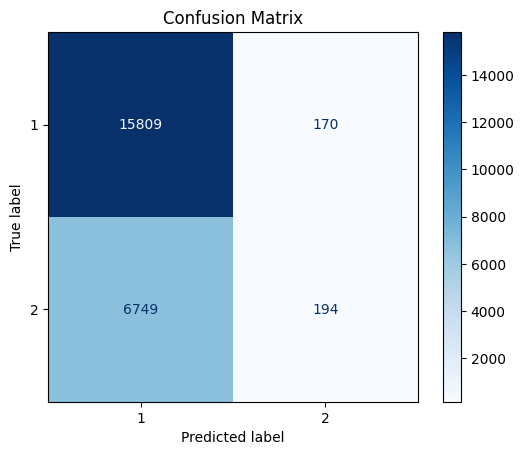

Text(0.5, 0, 'False Positive Rate')

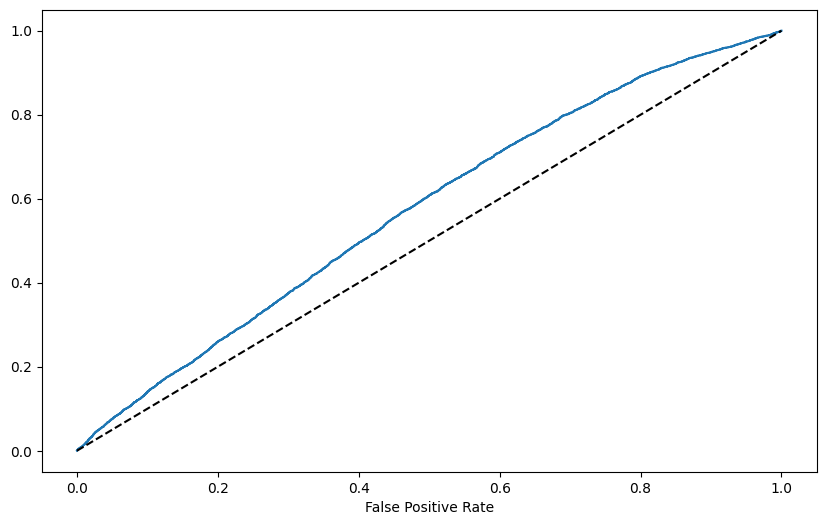

In [42]:
# Gerekli kütüphaneleri yükleyin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Veri setini bağımlı ve bağımsız değişkenlere ayırma
X = ready_cleaned.drop('Accident_Severity', axis=1)
y = ready_cleaned['Accident_Severity']

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Keras modelini oluşturma
model = Sequential()

# İlk katman: 64 nöronlu ve ReLU aktivasyonu
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Dropout katmanı
model.add(Dropout(0.3))

# İkinci katman: 32 nöronlu ve ReLU aktivasyonu
model.add(Dense(32, activation='relu'))

# Dropout katmanı
model.add(Dropout(0.3))

# Çıkış katmanı: 2 sınıf için softmax aktivasyonu
model.add(Dense(2, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping (erken durdurma) ile modelin eğitimi
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğitme
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Eğitim ve doğrulama kaybı grafiğini çizme
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı Grafiği')
plt.show()

# Modelin performansını değerlendirme
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Performans metriklerini yazdırma
print("\nTest Set Performance (Keras Modeli):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Eğrisini çizmek için veriyi binarize etme
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Her sınıf için ROC eğrisini hesaplama
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çizme
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Sınıf {i+1} ROC eğrisi (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin (AUC = 0.50)')
plt.xlabel('False Positive Rate')


In [41]:
!pip install tensorflow
